## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# setting the option to allow for full viewing of columns in DFs
pd.set_option("max_columns", None)

In [3]:
df = pd.read_csv("data/airline_sample_10k.csv")

In [4]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-08-17,DL,DL_CODESHARE,DL,3452,9E,N349PQ,3452,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,0,NaN,0,N,88,81.0,60.0,1,408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-28,AA,AA_CODESHARE,AA,6002,YV,N933LR,6002,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,0,NaN,0,N,129,126.0,93.0,1,597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-18,AA,AA,AA,2743,AA,N874NN,2743,11298,DFW,"Dallas/Fort Worth, TX",11540,ELP,"El Paso, TX",1523,1523.0,0.0,16.0,1539.0,1558.0,5.0,1609,1603.0,-6.0,0,NaN,0,N,106,100.0,79.0,1,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-08-13,DL,DL_CODESHARE,DL,3391,9E,N902XJ,3391,12953,LGA,"New York, NY",11057,CLT,"Charlotte, NC",757,914.0,77.0,53.0,1007.0,1125.0,4.0,1008,1129.0,81.0,0,NaN,0,N,131,135.0,78.0,1,544,75.0,0.0,4.0,0.0,2.0,NaN,NaN,NaN,NaN
4,2018-05-20,AA,AA_CODESHARE,AA,4603,YX,N407YX,4603,10994,CHS,"Charleston, SC",13303,MIA,"Miami, FL",1850,1844.0,-6.0,16.0,1900.0,2037.0,10.0,2031,2047.0,16.0,0,NaN,0,N,101,123.0,97.0,1,489,0.0,0.0,16.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                  27
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 162
dep_delay                167
taxi_out                 175
wheels_off               175
wheels_on                180
taxi_in                  180
crs_arr_time               0
arr_time                 176
arr_delay                200
cancelled                  0
cancellation_code       9828
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time      199
air_time                 203
flights                    0
distance                   0
carrier_delay           8132
weather_delay 

In [7]:
df = df.drop('no_name', axis = 1)

In [8]:
df.isnull().sum()

fl_date                   0
mkt_unique_carrier        0
branded_code_share        0
mkt_carrier               0
mkt_carrier_fl_num        0
op_unique_carrier         0
tail_num                 27
op_carrier_fl_num         0
origin_airport_id         0
origin                    0
origin_city_name          0
dest_airport_id           0
dest                      0
dest_city_name            0
crs_dep_time              0
dep_time                162
dep_delay               167
taxi_out                175
wheels_off              175
wheels_on               180
taxi_in                 180
crs_arr_time              0
arr_time                176
arr_delay               200
cancelled                 0
cancellation_code      9828
diverted                  0
dup                       0
crs_elapsed_time          0
actual_elapsed_time     199
air_time                203
flights                   0
distance                  0
carrier_delay          8132
weather_delay          8132
nas_delay           

In [9]:
#df1 = pd.DataFrame(df1)

In [10]:
#df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

In [11]:
#test = (stats.zscore(df['arr_delay']))

#df1['z_score'] = stats.zscore(df1)

#df1['arr_delay'][np.abs(df1['arr_delay'] - df1['arr_delay'].mean())<=(3*df1['arr_delay'].std())]
#keep only the ones that are within +3 to -3 standard deviations in the column 'Data'

In [12]:
#df1.head()

In [13]:
#df_nums = df.select_dtypes(include = 'number')

#df_cats = df.select_dtypes(include = 'object')

In [14]:
#df1.min()

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [15]:
#df1["arr_delay"] = df1['arr_delay'].apply(np.log)
#histplot = sns.histplot(data = df1["arr_delay"])
#histplot.set(xlim=(-400, 400))
#histplot.set(ylim=(0, 650))

#plt.show()

In [16]:
df["arr_delay"].isnull().sum()
df.dropna(subset = ["arr_delay"], inplace = True)

In [17]:
df["arr_delay"].isnull().sum()

0

In [18]:
#ask what is happening here, why the [] is needed for np.abs etc
df["arr_delay"] = df["arr_delay"][(np.abs(stats.zscore(df["arr_delay"])) < 3)]
#df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

In [19]:
#df.dropna(subset = ["arr_delay"], inplace = True)

In [20]:
#df.drop(df.loc[df['arr_delay']==0].index, inplace=True)
df['arr_delay'].mean()

0.7813828133098373

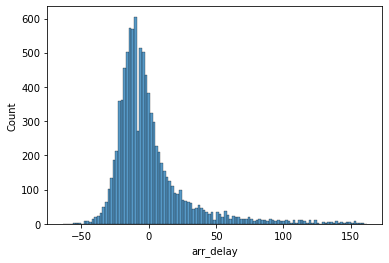

In [21]:
histplot = sns.histplot(data = df["arr_delay"])

In [22]:
#delay_arr = df['arr_delay'].to_numpy()
#delay_arr.reshape(-1, 1)

In [23]:
#shapiro_test = stats.shapiro(delay_arr)
#shapiro_test

In [24]:
df["arr_delay"].min()
df["arr_delay_const"] = df["arr_delay"] + 64.001
df["arr_delay_const"] = df["arr_delay_const"].apply(np.log)
df["arr_delay_const"].mean()

4.100054986236223

In [25]:
#shapiro_test = stats.shapiro(df['arr_delay'])
#shapiro_test

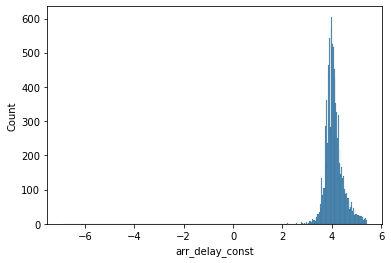

In [26]:
histplot = sns.histplot(data = df["arr_delay_const"])

In [27]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,arr_delay_const
0,2019-08-17,DL,DL_CODESHARE,DL,3452,9E,N349PQ,3452,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,0,NaN,0,N,88,81.0,60.0,1,408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.951263
1,2019-01-28,AA,AA_CODESHARE,AA,6002,YV,N933LR,6002,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,0,NaN,0,N,129,126.0,93.0,1,597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189670
2,2019-12-18,AA,AA,AA,2743,AA,N874NN,2743,11298,DFW,"Dallas/Fort Worth, TX",11540,ELP,"El Paso, TX",1523,1523.0,0.0,16.0,1539.0,1558.0,5.0,1609,1603.0,-6.0,0,NaN,0,N,106,100.0,79.0,1,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.060460
3,2019-08-13,DL,DL_CODESHARE,DL,3391,9E,N902XJ,3391,12953,LGA,"New York, NY",11057,CLT,"Charlotte, NC",757,914.0,77.0,53.0,1007.0,1125.0,4.0,1008,1129.0,81.0,0,NaN,0,N,131,135.0,78.0,1,544,75.0,0.0,4.0,0.0,2.0,NaN,NaN,NaN,4.976741
4,2018-05-20,AA,AA_CODESHARE,AA,4603,YX,N407YX,4603,10994,CHS,"Charleston, SC",13303,MIA,"Miami, FL",1850,1844.0,-6.0,16.0,1900.0,2037.0,10.0,2031,2047.0,16.0,0,NaN,0,N,101,123.0,97.0,1,489,0.0,0.0,16.0,0.0,0.0,NaN,NaN,NaN,4.382039


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [28]:
#df['DATE'] = pd.to_datetime(df[['fl_date']])
spl_date = [date.split('-')[1] for date in df['fl_date']]
#print (spl_date)

In [29]:
df['months'] = spl_date
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,arr_delay_const,months
0,2019-08-17,DL,DL_CODESHARE,DL,3452,9E,N349PQ,3452,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,0,NaN,0,N,88,81.0,60.0,1,408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.951263,08
1,2019-01-28,AA,AA_CODESHARE,AA,6002,YV,N933LR,6002,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,0,NaN,0,N,129,126.0,93.0,1,597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189670,01
2,2019-12-18,AA,AA,AA,2743,AA,N874NN,2743,11298,DFW,"Dallas/Fort Worth, TX",11540,ELP,"El Paso, TX",1523,1523.0,0.0,16.0,1539.0,1558.0,5.0,1609,1603.0,-6.0,0,NaN,0,N,106,100.0,79.0,1,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.060460,12
3,2019-08-13,DL,DL_CODESHARE,DL,3391,9E,N902XJ,3391,12953,LGA,"New York, NY",11057,CLT,"Charlotte, NC",757,914.0,77.0,53.0,1007.0,1125.0,4.0,1008,1129.0,81.0,0,NaN,0,N,131,135.0,78.0,1,544,75.0,0.0,4.0,0.0,2.0,NaN,NaN,NaN,4.976741,08
4,2018-05-20,AA,AA_CODESHARE,AA,4603,YX,N407YX,4603,10994,CHS,"Charleston, SC",13303,MIA,"Miami, FL",1850,1844.0,-6.0,16.0,1900.0,2037.0,10.0,2031,2047.0,16.0,0,NaN,0,N,101,123.0,97.0,1,489,0.0,0.0,16.0,0.0,0.0,NaN,NaN,NaN,4.382039,05


In [30]:
cols = list(df.columns)
cols.pop(cols.index('fl_date'))
cols.pop(cols.index('months'))
df = df[['fl_date','months'] + cols]
df.head()

,fl_date,months,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,arr_delay_const
0,2019-08-17,08,DL,DL_CODESHARE,DL,3452,9E,N349PQ,3452,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,0,NaN,0,N,88,81.0,60.0,1,408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.951263
1,2019-01-28,01,AA,AA_CODESHARE,AA,6002,YV,N933LR,6002,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,0,NaN,0,N,129,126.0,93.0,1,597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189670
2,2019-12-18,12,AA,AA,AA,2743,AA,N874NN,2743,11298,DFW,"Dallas/Fort Worth, TX",11540,ELP,"El Paso, TX",1523,1523.0,0.0,16.0,1539.0,1558.0,5.0,1609,1603.0,-6.0,0,NaN,0,N,106,100.0,79.0,1,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.060460
3,2019-08-13,08,DL,DL_CODESHARE,DL,3391,9E,N902XJ,3391,12953,LGA,"New York, NY",11057,CLT,"Charlotte, NC",757,914.0,77.0,53.0,1007.0,1125.0,4.0,1008,1129.0,81.0,0,NaN,0,N,131,135.0,78.0,1,544,75.0,0.0,4.0,0.0,2.0,NaN,NaN,NaN,4.976741
4,2018-05-20,05,AA,AA_CODESHARE,AA,4603,YX,N407YX,4603,10994,CHS,"Charleston, SC",13303,MIA,"Miami, FL",1850,1844.0,-6.0,16.0,1900.0,2037.0,10.0,2031,2047.0,16.0,0,NaN,0,N,101,123.0,97.0,1,489,0.0,0.0,16.0,0.0,0.0,NaN,NaN,NaN,4.382039


In [31]:
df['months'] = df['months'].astype(int)
#df.astype({'months': 'int32'})

In [32]:
df.groupby(by = 'months').mean()[['arr_delay']]

,arr_delay
months,
1,0.058108
2,0.464832
3,0.149112
4,0.098340
5,2.017381
6,3.419394
7,3.519119
8,5.278231
9,-2.275064


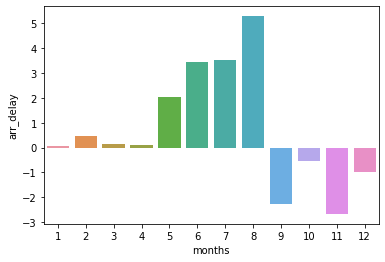

In [33]:
month_vs_delay = sns.barplot(x = df['months'], y = df['arr_delay'], ci = None)

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [34]:
df.head()

,fl_date,months,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,arr_delay_const
0,2019-08-17,8,DL,DL_CODESHARE,DL,3452,9E,N349PQ,3452,13487,MSP,"Minneapolis, MN",11986,GRR,"Grand Rapids, MI",710,705.0,-5.0,18.0,723.0,923.0,3.0,938,926.0,-12.0,0,NaN,0,N,88,81.0,60.0,1,408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.951263
1,2019-01-28,1,AA,AA_CODESHARE,AA,6002,YV,N933LR,6002,10599,BHM,"Birmingham, AL",11298,DFW,"Dallas/Fort Worth, TX",1251,1256.0,5.0,19.0,1315.0,1448.0,14.0,1500,1502.0,2.0,0,NaN,0,N,129,126.0,93.0,1,597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189670
2,2019-12-18,12,AA,AA,AA,2743,AA,N874NN,2743,11298,DFW,"Dallas/Fort Worth, TX",11540,ELP,"El Paso, TX",1523,1523.0,0.0,16.0,1539.0,1558.0,5.0,1609,1603.0,-6.0,0,NaN,0,N,106,100.0,79.0,1,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.060460
3,2019-08-13,8,DL,DL_CODESHARE,DL,3391,9E,N902XJ,3391,12953,LGA,"New York, NY",11057,CLT,"Charlotte, NC",757,914.0,77.0,53.0,1007.0,1125.0,4.0,1008,1129.0,81.0,0,NaN,0,N,131,135.0,78.0,1,544,75.0,0.0,4.0,0.0,2.0,NaN,NaN,NaN,4.976741
4,2018-05-20,5,AA,AA_CODESHARE,AA,4603,YX,N407YX,4603,10994,CHS,"Charleston, SC",13303,MIA,"Miami, FL",1850,1844.0,-6.0,16.0,1900.0,2037.0,10.0,2031,2047.0,16.0,0,NaN,0,N,101,123.0,97.0,1,489,0.0,0.0,16.0,0.0,0.0,NaN,NaN,NaN,4.382039


#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [35]:
#df["taxi_out"] = df["taxi_out"][(np.abs(stats.zscore(df["taxi_out"])) < 3)]

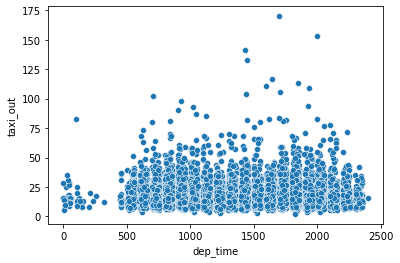

In [36]:
taxi_graph = sns.scatterplot(x = df['dep_time'], y = df['taxi_out'])

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [44]:
df.head()
# we want to see proportion of dep_delay > 0 resulting in arr_delay > 0
df_delarr = df.loc[(df['dep_delay'] > 0) & (df['arr_delay'] > 0)]
df_delarr = df_delarr[['dep_delay', 'arr_delay']]
len(df_delarr),len(df)

(2277, 9800)

In [ ]:
# avg percentage of delays  = (2277/9800) * 100


#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?